In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sparkstreaming/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

In [6]:
from pyspark.sql import SparkSession, functions as f

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('WordCloud')\
    .getOrCreate()

In [7]:
def trata_tweets(df):
    words = df\
        .select(f.explode(f.split(f.lower('_c0'), ' ')).alias('word'))\
        .withColumn('word', f.regexp_replace('word',r'http\S+', ''))\
        .withColumn('word', f.regexp_replace('word', r'@\w+', ''))\
        .withColumn('word', f.regexp_replace('word', 'rt', ''))\
        .na.replace('', None)\
        .na.drop()
    return words

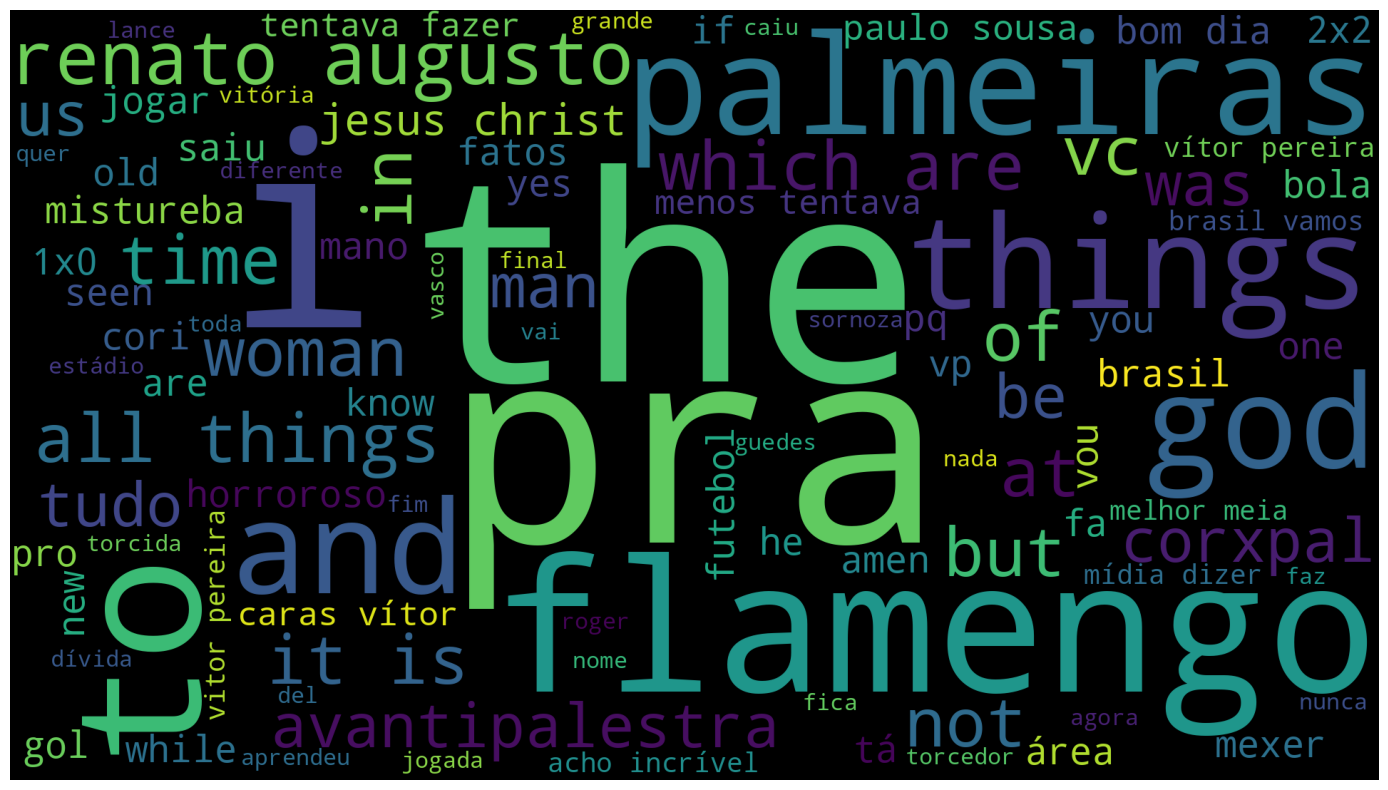

In [12]:
stops = stopwords.words('portuguese')
stops.append('corinthians')
plt.figure(figsize=(20,10))

while True:
    try:
        words = spark.read.csv('./csv/', encoding='utf-8')
        words = trata_tweets(words)
        rows = words.collect()
        all_words = ''

        for row in rows:
            all_words = all_words + ' ' + row['word']

        wordcloud = WordCloud(stopwords=stops, background_color='black', width=1920, height=1080, max_words=100)\
            .generate(all_words)

        plt.cla()
        plt.axis('off')
        plt.imshow(wordcloud)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(5)
    except KeyboardInterrupt:
        break